# 데이터 사이언스 최종 과제 
### 컴퓨터공학과 
### 202130422 박연수 

### train.csv   
주어진 훈련 데이터는 store_nbr, family, onpromotion이라는 특징들의 시계열과 목표 변수인 sales로 구성됩니다.   

- store_nbr: 제품이 판매된 매장을 식별합니다.   
- family: 판매된 제품의 종류를 식별합니다.   
- sales: 특정 날짜에 특정 매장에서 제품군의 총 판매량을 나타냅니다. 제품이 분수 단위로 판매될 수 있기 때문에, 판매량은 소수 값일 수도 있습니다(예: 치즈 1.5kg 또는 감자칩 1봉지).   
- onpromotion: 특정 날짜에 특정 매장에서 특정 제품군의 프로모션 중인 아이템 수를 나타냅니다.   

### test.csv
테스트 데이터는 훈련 데이터와 동일한 특징을 가지고 있습니다. 이 파일에 있는 날짜에 대해 목표 판매량(sales)을 예측해야 합니다. 테스트 데이터의 날짜는 훈련 데이터의 마지막 날짜 이후 15일 동안의 날짜를 포함합니다.

### sample_submission.csv
올바른 형식의 샘플 제출 파일입니다.

### stores.csv
도시, 주(state), 유형(type), 클러스터(cluster)를 포함한 매장 메타데이터입니다. 클러스터는 유사한 매장들의 그룹을 나타냅니다.

### oil.csv
일별 유가를 나타냅니다. 훈련 데이터와 테스트 데이터 기간 동안의 유가를 포함합니다. 에콰도르는 석유 의존 국가이므로, 유가 충격에 경제적으로 매우 취약합니다.

### holidays_events.csv
휴일 및 이벤트에 대한 메타데이터를 포함하고 있습니다.   

참고: transferred 열에 특히 주의해야 합니다.    
공식적으로 휴일이 해당 날짜에 있지만 정부에 의해 다른 날짜로 이동된 경우, transferred 열이 표시됩니다. 이 경우, 해당 날짜는 일반 평일과 비슷합니다.   
실제로 축하된 날짜를 찾으려면, type이 Transfer인 행을 찾아보세요. 예를 들어, Independencia de Guayaquil 휴일은 2012-10-09에서 2012-10-12로 이동되었습니다.   
이는 2012-10-12에 축하되었음을 의미합니다. Bridge 유형은 휴일에 추가되는 추가 날짜를 나타내며, 자주 Work Day 유형으로 보상됩니다.      
Work Day는 일반적으로 근무하지 않는 날(예: 토요일)을 나타내며, Bridge를 보상하기 위해 사용됩니다.    
추가 휴일은 정규 달력 휴일에 추가되는 날을 의미하며, 예를 들어, 크리스마스 주위에 자주 발생합니다(크리스마스 이브를 휴일로 만드는 경우).      
이 정보를 바탕으로 테스트 데이터에 대해 예측을 수행하고, 결과를 제출 파일 형식에 맞추어 제출해야 합니다.      

In [34]:
import pandas as pd 

holidays_events = pd.read_csv('data/holidays_events.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')
stores = pd.read_csv('data/stores.csv')
oil = pd.read_csv('data/oil.csv')

test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')
transactions = pd.read_csv('data/transactions.csv') 

In [35]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [36]:
# 병합
train = pd.merge(train, stores, on='store_nbr', how='outer')
test = pd.merge(test, stores, on='store_nbr', how='outer')
# id가 NaN이면 삭제 (없는 데이터)
train= train.dropna(subset=['id'])
test = test.dropna(subset=['id'])
train

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6


In [37]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [38]:
# 12개의 Transferred 항목이 있고 다음과 같음.
trans = holidays_events[holidays_events['transferred'] == True]
trans 

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


In [39]:
# transferred는 평일과 같기에 drop하고 Transfer 유형을 Holiday로 수정한다.
holidays_events = holidays_events[holidays_events['transferred'] != True]

holidays_events.loc[holidays_events['type'] == 'Transfer', 'type'] = 'Holiday'
holidays_events = holidays_events.drop('transferred', axis=1)
holidays_events

,date,type,locale,locale_name,description
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba
...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3
346,2017-12-23,Additional,National,Ecuador,Navidad-2
347,2017-12-24,Additional,National,Ecuador,Navidad-1
348,2017-12-25,Holiday,National,Ecuador,Navidad


In [40]:
train

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6


In [41]:
test

,id,date,store_nbr,family,onpromotion,city,state,type,cluster
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,Quito,Pichincha,B,6
28508,3029396,2017-08-31,9,PREPARED FOODS,0,Quito,Pichincha,B,6
28509,3029397,2017-08-31,9,PRODUCE,1,Quito,Pichincha,B,6
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,Quito,Pichincha,B,6


In [42]:
# 병합
train = pd.merge(train, holidays_events, on='date', how='outer')
test = pd.merge(test, holidays_events, on='date', how='outer')
# id가 NaN이면 삭제 (없는 데이터)
train= train.dropna(subset=['id'])
test = test.dropna(subset=['id'])

In [43]:
test

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description
0,3000888.0,2017-08-16,1.0,AUTOMOTIVE,0.0,Quito,Pichincha,D,13.0,NaN,NaN,NaN,NaN
1,3000889.0,2017-08-16,1.0,BABY CARE,0.0,Quito,Pichincha,D,13.0,NaN,NaN,NaN,NaN
2,3000890.0,2017-08-16,1.0,BEAUTY,2.0,Quito,Pichincha,D,13.0,NaN,NaN,NaN,NaN
3,3000891.0,2017-08-16,1.0,BEVERAGES,20.0,Quito,Pichincha,D,13.0,NaN,NaN,NaN,NaN
4,3000892.0,2017-08-16,1.0,BOOKS,0.0,Quito,Pichincha,D,13.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395.0,2017-08-31,9.0,POULTRY,1.0,Quito,Pichincha,B,6.0,NaN,NaN,NaN,NaN
28508,3029396.0,2017-08-31,9.0,PREPARED FOODS,0.0,Quito,Pichincha,B,6.0,NaN,NaN,NaN,NaN
28509,3029397.0,2017-08-31,9.0,PRODUCE,1.0,Quito,Pichincha,B,6.0,NaN,NaN,NaN,NaN
28510,3029398.0,2017-08-31,9.0,SCHOOL AND OFFICE SUPPLIES,9.0,Quito,Pichincha,B,6.0,NaN,NaN,NaN,NaN


In [44]:
# 기존보다 data가 많아진 이유는 holiday의 중복이 있기 때문이다.

duplicates = holidays_events[holidays_events.duplicated('date', keep=False)]
duplicate_dates = holidays_events['date'][holidays_events['date'].duplicated()].unique()
duplicate_dates

array(['2012-06-25', '2012-07-03', '2012-12-22', '2012-12-24',
       '2012-12-31', '2013-05-12', '2013-06-25', '2013-07-03',
       '2013-12-22', '2014-06-25', '2014-07-03', '2014-12-22',
       '2014-12-26', '2015-06-25', '2015-07-03', '2015-12-22',
       '2016-04-21', '2016-05-01', '2016-05-07', '2016-05-08',
       '2016-05-12', '2016-06-25', '2016-07-03', '2016-07-24',
       '2016-11-12', '2016-12-22', '2017-04-14', '2017-06-25',
       '2017-07-03', '2017-12-08', '2017-12-22'], dtype=object)

In [45]:
train = pd.merge(train, oil, on='date', how='outer')
test = pd.merge(test, oil, on='date', how='outer')

train= train.dropna(subset=['id'])
test = test.dropna(subset=['id'])

In [46]:
correlation = train[['sales', 'dcoilwtico']].corr()
correlation

,sales,dcoilwtico
sales,1.000000,-0.079393
dcoilwtico,-0.079393,1.000000


In [47]:
train['type_y'].unique()

array(['Holiday', nan, 'Work Day', 'Additional', 'Event', 'Bridge'],
      dtype=object)

In [48]:
train['type_y'] = train['type_y'].fillna('Weekday')

# 'type'을 더미 변수로 변환
train_dummies = pd.get_dummies(train['type_y'], prefix='type_y')

# 원본 데이터프레임과 더미 변수를 합침
train_with_dummies = pd.concat([train, train_dummies], axis=1)

# 각 'type' 카테고리와 'sales'의 상관계수 계산
correlations = {}
for column in train_dummies.columns:
    correlation = train_with_dummies[column].corr(train_with_dummies['sales'])
    correlations[column] = correlation

# 결과 출력
correlations
train_with_dummies 

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,...,locale,locale_name,description,dcoilwtico,type_y_Additional,type_y_Bridge,type_y_Event,type_y_Holiday,type_y_Weekday,type_y_Work Day
0,0.0,2013-01-01,1.0,AUTOMOTIVE,0.000,0.0,Quito,Pichincha,D,13.0,...,National,Ecuador,Primer dia del ano,NaN,False,False,False,True,False,False
1,1.0,2013-01-01,1.0,BABY CARE,0.000,0.0,Quito,Pichincha,D,13.0,...,National,Ecuador,Primer dia del ano,NaN,False,False,False,True,False,False
2,2.0,2013-01-01,1.0,BEAUTY,0.000,0.0,Quito,Pichincha,D,13.0,...,National,Ecuador,Primer dia del ano,NaN,False,False,False,True,False,False
3,3.0,2013-01-01,1.0,BEVERAGES,0.000,0.0,Quito,Pichincha,D,13.0,...,National,Ecuador,Primer dia del ano,NaN,False,False,False,True,False,False
4,4.0,2013-01-01,1.0,BOOKS,0.000,0.0,Quito,Pichincha,D,13.0,...,National,Ecuador,Primer dia del ano,NaN,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883.0,2017-08-15,9.0,POULTRY,438.133,0.0,Quito,Pichincha,B,6.0,...,Local,Riobamba,Fundacion de Riobamba,47.57,False,False,False,True,False,False
3054344,3000884.0,2017-08-15,9.0,PREPARED FOODS,154.553,1.0,Quito,Pichincha,B,6.0,...,Local,Riobamba,Fundacion de Riobamba,47.57,False,False,False,True,False,False
3054345,3000885.0,2017-08-15,9.0,PRODUCE,2419.729,148.0,Quito,Pichincha,B,6.0,...,Local,Riobamba,Fundacion de Riobamba,47.57,False,False,False,True,False,False
3054346,3000886.0,2017-08-15,9.0,SCHOOL AND OFFICE SUPPLIES,121.000,8.0,Quito,Pichincha,B,6.0,...,Local,Riobamba,Fundacion de Riobamba,47.57,False,False,False,True,False,False


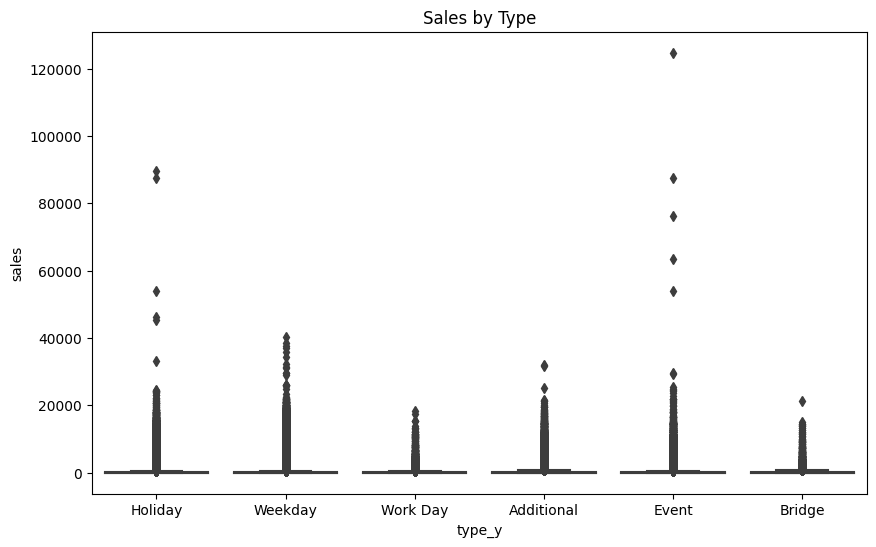

In [49]:
  
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='type_y', y='sales', data=train)
plt.title('Sales by Type')
plt.show()